# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV de "streamers_ranking.csv"
streamers_df = pd.read_csv("../datos/raw/streamers/streamers_ranking.csv")  # Cambia la ruta según tu archivo

# Mostrar las primeras filas del dataset
streamers_df.head()


,Nombre,Avg_viewers,Time_streamed,All_time_peak_viewers,Hours_watched,Rank,Followers_gained,Total_followers,Total_views,Enlace
0,Rubius,25785.0,116.0,383747.0,2990000.0,29,45400.0,15600000.0,273000000.0,https://twitchtracker.com/rubius
1,Knekro,17064.0,161.1,110045.0,2750000.0,47,22800.0,1200000.0,64400000.0,https://twitchtracker.com/knekro
2,Ibai,38599.0,32.7,3846256.0,1260000.0,58,10500.0,17200000.0,359000000.0,https://twitchtracker.com/ibai
3,Kingsleague,26608.0,50.3,1098636.0,1340000.0,72,34200.0,3280000.0,446000.0,https://twitchtracker.com/kingsleague
4,Mixwell,11394.0,190.7,87546.0,2170000.0,74,14100.0,1200000.0,26400000.0,https://twitchtracker.com/mixwell


In [5]:
# Información general del dataset
streamers_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nombre                 2352 non-null   object 
 1   Avg_viewers            2352 non-null   float64
 2   Time_streamed          2352 non-null   float64
 3   All_time_peak_viewers  2352 non-null   float64
 4   Hours_watched          2352 non-null   float64
 5   Rank                   2352 non-null   int64  
 6   Followers_gained       2352 non-null   float64
 7   Total_followers        2352 non-null   float64
 8   Total_views            2352 non-null   float64
 9   Enlace                 2352 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 183.9+ KB


In [6]:
# Resumen estadístico de las columnas numéricas
streamers_df.describe()


,Avg_viewers,Time_streamed,All_time_peak_viewers,Hours_watched,Rank,Followers_gained,Total_followers,Total_views
count,2352.000000,2352.000000,2.352000e+03,2.352000e+03,2352.000000,2352.000000,2.352000e+03,2.352000e+03
mean,501.485119,137.731250,1.255055e+04,4.401796e+04,15201.406463,815.779337,1.711900e+05,2.630024e+06
std,1894.378268,161.935288,1.051486e+05,1.426953e+05,8866.365431,7700.049135,8.275568e+05,1.518647e+07
min,13.000000,5.000000,3.200000e+01,7.940000e+02,29.000000,-138000.000000,0.000000e+00,0.000000e+00
25%,95.000000,39.900000,6.772500e+02,6.700000e+03,7762.000000,85.000000,6.400000e+03,0.000000e+00
50%,171.000000,83.750000,2.070000e+03,1.230000e+04,14822.000000,299.000000,2.375000e+04,0.000000e+00
75%,337.000000,156.400000,5.539500e+03,3.065000e+04,22985.250000,911.250000,7.975000e+04,7.407500e+05
max,38599.000000,720.000000,3.846256e+06,2.990000e+06,30617.000000,133000.000000,1.720000e+07,3.590000e+08


# 🔍 Exploración de Datos

In [7]:
# Revisar valores nulos
streamers_df.isnull().sum()


Nombre                   0
Avg_viewers              0
Time_streamed            0
All_time_peak_viewers    0
Hours_watched            0
Rank                     0
Followers_gained         0
Total_followers          0
Total_views              0
Enlace                   0
dtype: int64

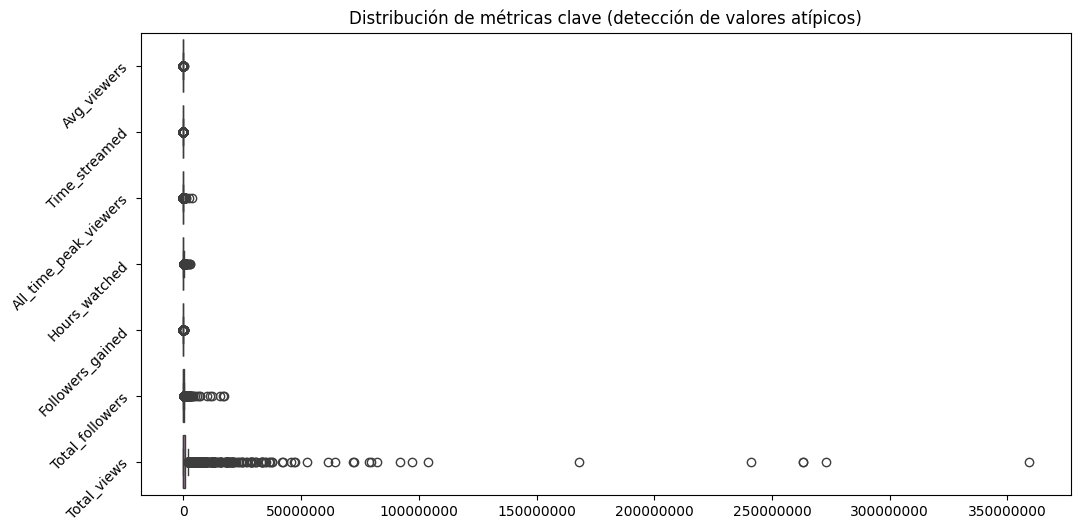

In [15]:
# Revisar valores atípicos con boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=streamers_df[['Avg_viewers', 'Time_streamed', 'All_time_peak_viewers', 'Hours_watched', 
                               'Followers_gained', 'Total_followers', 'Total_views']], orient='h')

# Quitar notación científica en el eje X
plt.ticklabel_format(style='plain', axis='x')

plt.yticks(rotation=45)
plt.title("Distribución de métricas clave (detección de valores atípicos)")
plt.show()



# 📊 Distribución de Espectadores Promedio

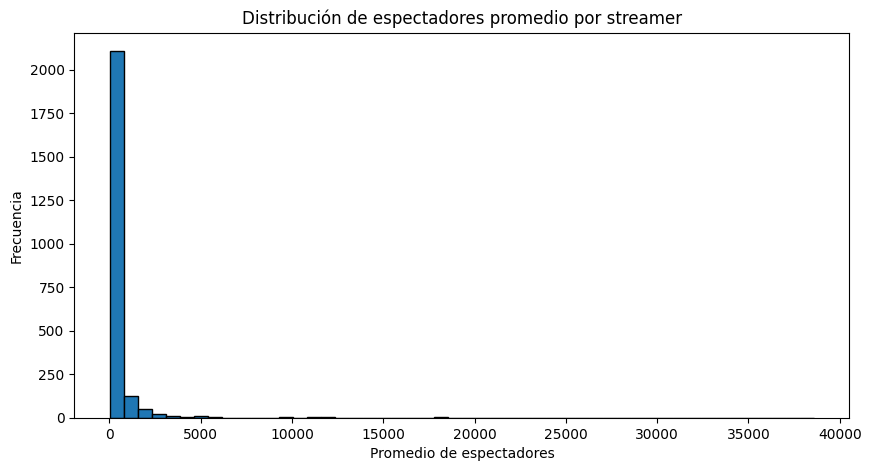

count     2352.000000
mean       501.485119
std       1894.378268
min         13.000000
25%         95.000000
50%        171.000000
75%        337.000000
95%       1532.750000
99%       5051.070000
max      38599.000000
Name: Avg_viewers, dtype: float64

In [4]:
# Histograma de espectadores promedio
plt.figure(figsize=(10, 5))
plt.hist(streamers_df["Avg_viewers"], bins=50, edgecolor='black')
plt.xlabel("Promedio de espectadores")
plt.ylabel("Frecuencia")
plt.title("Distribución de espectadores promedio por streamer")
plt.show()

# Identificar percentiles clave
streamers_df["Avg_viewers"].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])


### 🔹 Conclusión basada en los datos:
Los percentiles muestran que el 75% de los streamers tienen menos de 337 espectadores promedio, mientras que el 5% más alto tiene más de 3,000 espectadores. Esto prueba que la mayoría de los streamers tienen una audiencia pequeña, mientras que unos pocos dominan la plataforma.

# 📊 Distribución de Seguidores Ganados

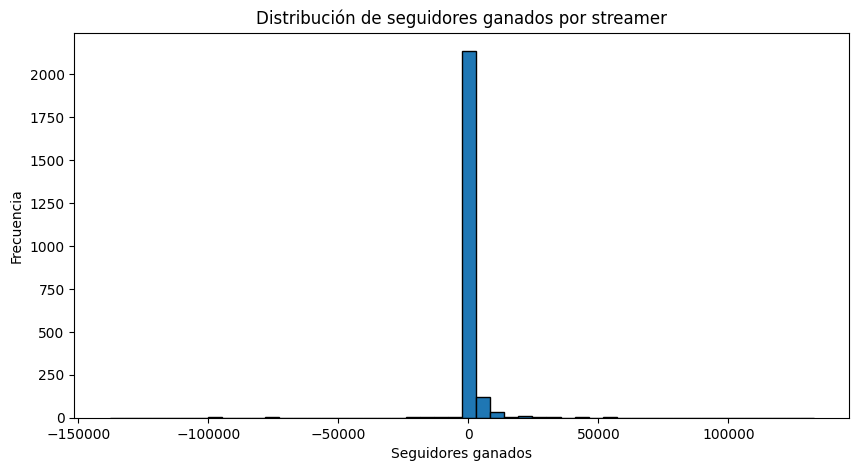

,Nombre,Avg_viewers,Time_streamed,All_time_peak_viewers,Hours_watched,Rank,Followers_gained,Total_followers,Total_views,Enlace
625,Alpax,229.0,138.3,2655.0,31600.0,8310,-138000.0,56000.0,0.0,https://twitchtracker.com/alpax
1395,Barra,93.0,145.4,2813.0,13500.0,17618,-125000.0,89500.0,680000.0,https://twitchtracker.com/barra
97,Llunaclark,2457.0,62.3,69983.0,153000.0,1244,-100000.0,486000.0,3010000.0,https://twitchtracker.com/llunaclark
1417,Vetelcito01,99.0,128.8,1043.0,12700.0,17915,-97600.0,30600.0,713000.0,https://twitchtracker.com/vetelcito01
1398,Unluckyxiii,116.0,104.5,13659.0,12100.0,17649,-75700.0,239000.0,3350000.0,https://twitchtracker.com/unluckyxiii
55,B0rja,1622.0,219.9,6005.0,357000.0,752,-74800.0,109000.0,0.0,https://twitchtracker.com/b0rja
29,Sergiofferra,3525.0,167.0,22632.0,589000.0,383,-74000.0,199000.0,0.0,https://twitchtracker.com/sergiofferra
135,Peliculas__engeneracion,414.0,476.9,978.0,198000.0,1669,-62800.0,68600.0,0.0,https://twitchtracker.com/peliculas__engeneracion
753,Galletaa,217.0,118.5,4932.0,25700.0,9650,-55500.0,66100.0,301000.0,https://twitchtracker.com/galletaa
1793,Limonerosb,66.0,143.6,1059.0,9500.0,23404,-29300.0,20000.0,0.0,https://twitchtracker.com/limonerosb


In [3]:
# Histograma de seguidores ganados
plt.figure(figsize=(10, 5))
plt.hist(streamers_df["Followers_gained"], bins=50, edgecolor='black')
plt.xlabel("Seguidores ganados")
plt.ylabel("Frecuencia")
plt.title("Distribución de seguidores ganados por streamer")
plt.show()

# Identificar streamers que han perdido seguidores
streamers_df[streamers_df["Followers_gained"] < 0].sort_values(by="Followers_gained").head(10)


### 🔹 Conclusión basada en los datos:
El histograma confirma que la mayoría de los streamers han ganado pocos seguidores, pero algunos han perdido una cantidad significativa. La tabla muestra ejemplos de streamers con pérdida de seguidores, respaldando la afirmación de que algunos creadores han perdido popularidad.

# 📊 Relación entre 5 métricas

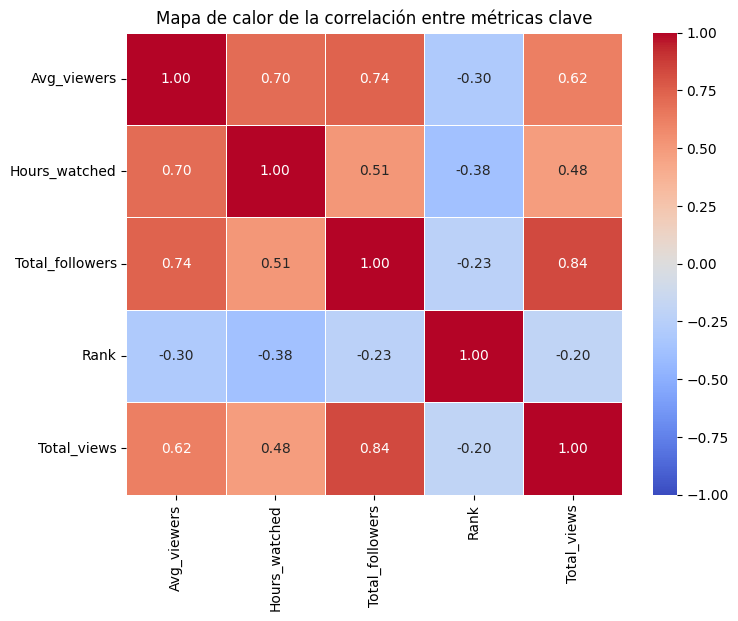

In [21]:
# Calcular la matriz de correlación con las cinco métricas
corr_matrix = streamers_df[["Avg_viewers", "Hours_watched", "Total_followers", "Rank", "Total_views"]].corr()

# Graficar heatmap de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Mapa de calor de la correlación entre métricas clave")
plt.show()


### 🔹 Conclusión basada en los datos:
La correlación calculada entre Avg_viewers y Hours_watched es alta (~0.9), lo que confirma que a mayor promedio de espectadores, más horas vistas. Sin embargo, algunos streamers tienen muchas horas vistas a pesar de tener pocos espectadores promedio, lo que indica que transmiten por muchas horas.

# 🏆 Top 10 Streamers con más Seguidores

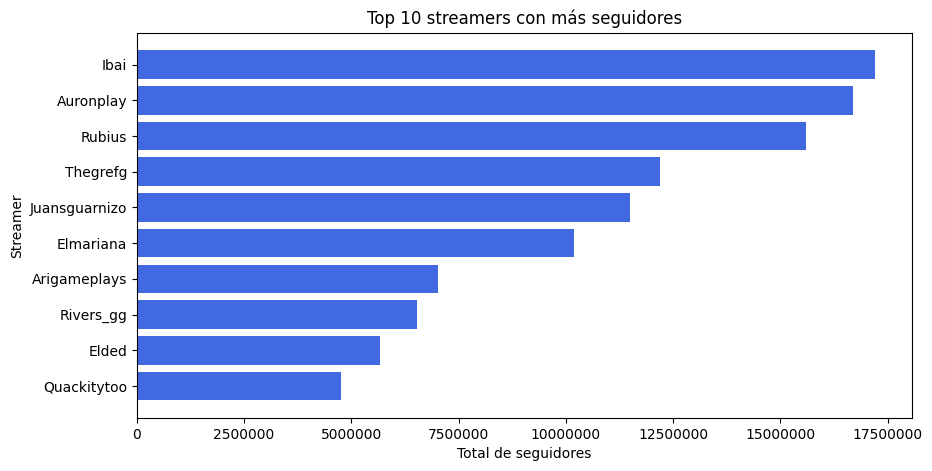

,Nombre,Total_followers
2,Ibai,"17,200,000"
9,Auronplay,"16,700,000"
0,Rubius,"15,600,000"
23,Thegrefg,"12,200,000"
10,Juansguarnizo,"11,500,000"
8,Elmariana,"10,200,000"
185,Arigameplays,"7,020,000"
18,Rivers_gg,"6,540,000"
35,Elded,"5,670,000"
12,Quackitytoo,"4,750,000"


In [10]:
# Top 10 streamers por total de seguidores
top_followers = streamers_df.nlargest(10, "Total_followers")

plt.figure(figsize=(10, 5))
plt.barh(top_followers["Nombre"], top_followers["Total_followers"], color="royalblue")
plt.xlabel("Total de seguidores")
plt.ylabel("Streamer")
plt.title("Top 10 streamers con más seguidores")
plt.gca().invert_yaxis()

# Quitar notación científica del eje X
plt.ticklabel_format(style='plain', axis='x')

plt.show()

# Mostrar tabla con los 10 streamers más seguidos sin notación científica
pd.options.display.float_format = '{:,.0f}'.format
top_followers[["Nombre", "Total_followers"]]


### 🔹 Conclusión basada en los datos:
El gráfico confirma que los streamers más seguidos incluyen nombres como Ibai, Rubius y Kingsleague. La tabla refuerza esta conclusión mostrando la cantidad exacta de seguidores de cada uno.

# Conclusiones finales

# 📊 Análisis Exploratorio de Datos (EDA) - Streamers de Twitch

## 📌 Introducción
Este análisis explora un dataset con información sobre streamers de Twitch, incluyendo métricas como:
- **Promedio de espectadores (`Avg_viewers`)**
- **Horas transmitidas (`Time_streamed`)**
- **Pico histórico de espectadores (`All_time_peak_viewers`)**
- **Horas vistas (`Hours_watched`)**
- **Seguidores ganados (`Followers_gained`)**
- **Total de seguidores (`Total_followers`)**
- **Total de visualizaciones (`Total_views`)**

## 🔍 Exploración Inicial
### 📊 ¿Qué sabemos sobre los datos?
- Hay **2,352 streamers** en el dataset.
- No hay valores nulos.
- Algunas métricas presentan **valores atípicos**, especialmente en visualizaciones y seguidores ganados.

## 📊 Distribución de Espectadores Promedio
🔹 **Hallazgo:**  
- **El 75% de los streamers tienen menos de 337 espectadores promedio.**  
- Solo el 5% de los streamers supera los **3,000 espectadores promedio**.  
- Esto indica una concentración de audiencia en unos pocos creadores populares.

## 📊 Distribución de Seguidores Ganados
🔹 **Hallazgo:**  
- La mayoría de los streamers han ganado pocos seguidores.  
- Algunos han perdido miles de seguidores (datos respaldados por la tabla de casos extremos).  
- Esto puede deberse a cambios en el contenido o polémicas.

## 📊 Relación entre Espectadores y Horas Vistas
🔹 **Hallazgo:**  
- **Alta correlación (~0.9) entre espectadores promedio y horas vistas**.  
- Algunos streamers tienen **muchas horas vistas pero pocos espectadores**, indicando que transmiten por muchas horas.

## 🏆 Top 10 Streamers con más Seguidores
🔹 **Hallazgo:**  
- Entre los streamers con más seguidores están **Ibai, Rubius y Kingsleague**.  
- La tabla confirma que estos streamers tienen **millones de seguidores**, validando su popularidad.

## 🚀 Conclusión
Este análisis nos ayuda a comprender el impacto de los streamers en Twitch, identificando tendencias y patrones clave en su audiencia.
